# CS 109A/AC 209A/STAT 121A Data Science: Final Project
**Harvard University**<br>
**Fall 2016**<br>
**Instructors:** W. Pan, P. Protopapas, K. Rader<br>
**Members: ** Shawn Pan, Xinyuan (Amy) Wang, Ming-long Wu

## Remark ##
- Explore data from listings Part 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
%matplotlib inline

#data = np.genfromtxt("listings_clean.csv", skip_header=1, delimiter=",")
data = pd.read_csv("listings_clean.csv")

#print data[:5,:]
print data.shape
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
print x.shape
print y.shape

(27392, 31)
(27392, 30)
(27392,)


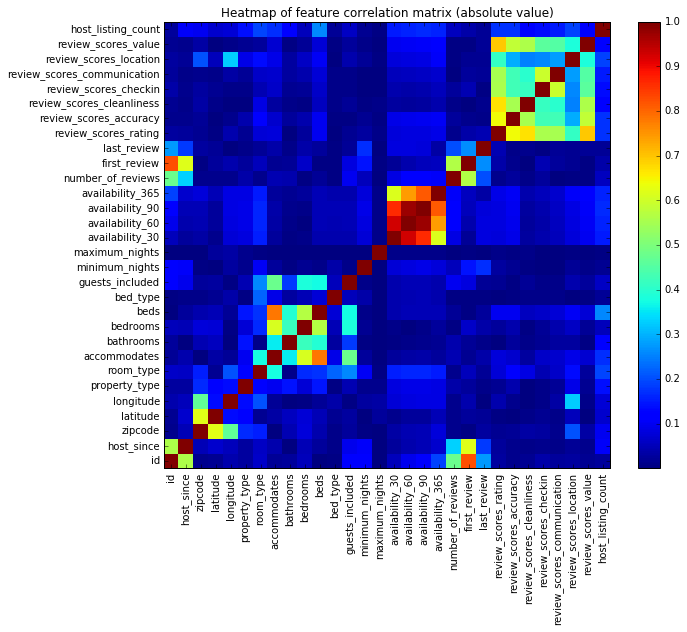

In [30]:
#heatmap of correlation coefficients
corr_matrix = x.corr()
column_names = list(x.columns)
column_range = np.linspace(0.5, x.shape[1] - 0.5, x.shape[1])
plt.figure(figsize=(10, 8))
plt.pcolor(np.abs(corr_matrix))
plt.title("Heatmap of feature correlation matrix (absolute value)")
plt.colorbar()
plt.xticks(column_range, column_names, rotation="vertical")
plt.yticks(column_range, column_names)
plt.show()

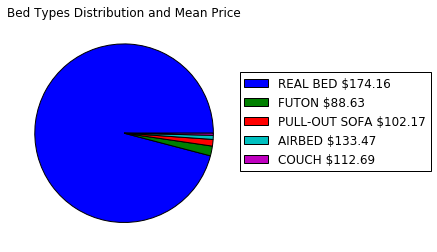

In [67]:
labels = ['REAL BED', 'FUTON', 'PULL-OUT SOFA', 'AIRBED', 'COUCH']
counts = np.bincount(x["bed_type"])
prices = y.groupby(x["bed_type"]).mean()
labelprice = ["{0} ${1:.2f}".format(l, p) for l, p in zip(labels, prices)]

plt.figure(figsize=(4, 4))
plt.title("Bed Types Distribution and Mean Price")
plt.pie(counts)
plt.legend(bbox_to_anchor=(1.9, 0.8), labels=labelprice);

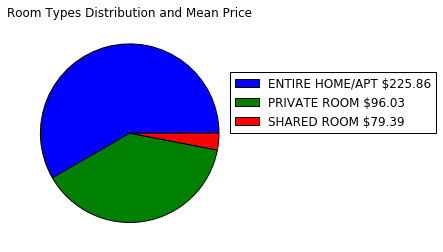

In [66]:
labels = ['ENTIRE HOME/APT', 'PRIVATE ROOM', 'SHARED ROOM']
counts = np.bincount(x["room_type"])
prices = y.groupby(x["room_type"]).mean()
labelprice = ["{0} ${1:.2f}".format(l, p) for l, p in zip(labels, prices)]

plt.figure(figsize=(4, 4))
plt.title("Room Types Distribution and Mean Price")
plt.pie(counts)
plt.legend(bbox_to_anchor=(1.9, 0.8), labels=labelprice);

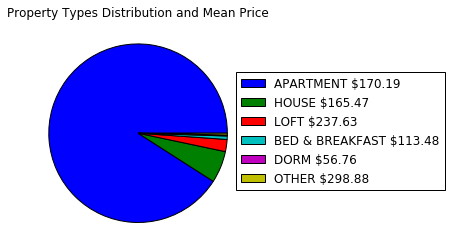

In [68]:
labels=['APARTMENT', 'HOUSE', 'LOFT', 'BED & BREAKFAST', 'DORM', 'OTHER']
counts = np.bincount(x["property_type"])
prices = y.groupby(x["property_type"]).mean()
labelprice = ["{0} ${1:.2f}".format(l, p) for l, p in zip(labels, prices)]

plt.figure(figsize=(4, 4))
plt.title("Property Types Distribution and Mean Price")
plt.pie(counts)
plt.legend(bbox_to_anchor=(1.9, 0.8), labels=labelprice);

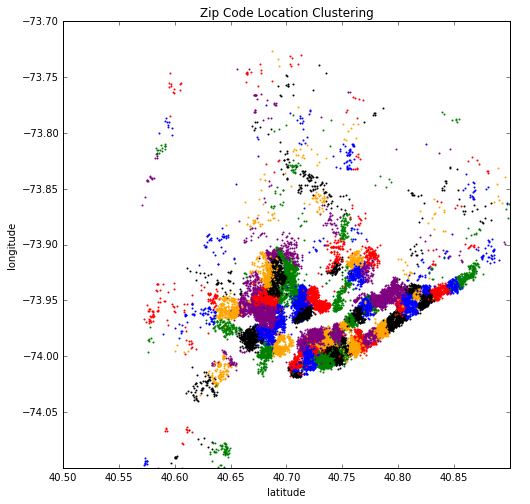

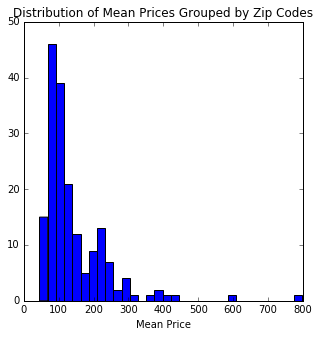

In [5]:
import itertools
colors = itertools.cycle(["red", "blue", "green", "purple", "orange", "black"])

prices = []
plt.figure(figsize=(8, 8))
plt.title("Zip Code Location Clustering")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.xlim((40.5, 40.9))
plt.ylim((-74.1, -73.7))
for name, group in data.groupby(data["zipcode"]):
    plt.scatter(group["latitude"], group["longitude"], s=1, color=next(colors))
    prices.append(group["price"].mean())
    
plt.figure(figsize=(5, 5))
plt.title("Distribution of Mean Prices Grouped by Zip Codes")
plt.xlabel("Mean Price")
plt.hist(prices, bins=32);

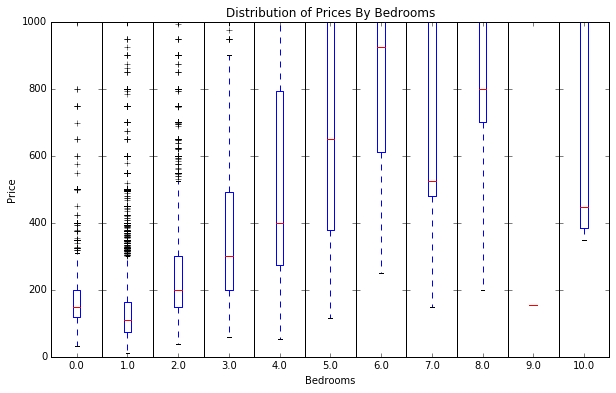

In [10]:
groups = data.groupby(data["bedrooms"])
fig, axes = plt.subplots(ncols=len(groups), sharey=True)
fig.set_figwidth(10)
fig.set_figheight(6)
fig.subplots_adjust(wspace=0)

for ax, (name, group) in zip(axes, groups):
    ax.boxplot(group["price"].as_matrix())
    ax.set(xticklabels=[name])

axes[0].set_ylabel("Price")
axes[0].set_ylim((0, 1000))
axes[len(groups) / 2].set_xlabel("Bedrooms")
axes[len(groups) / 2].set_title("Distribution of Prices By Bedrooms")

plt.show()

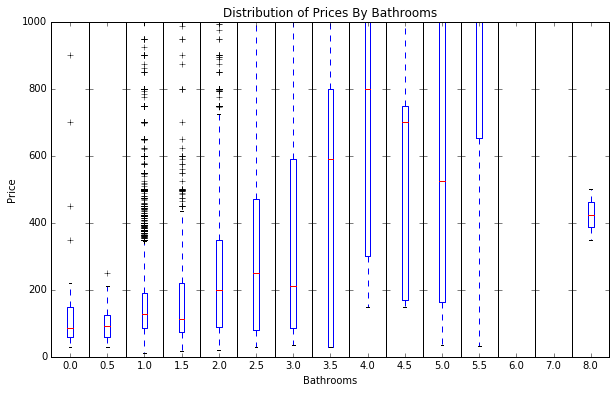

In [11]:
groups = data.groupby(data["bathrooms"])
fig, axes = plt.subplots(ncols=len(groups), sharey=True)
fig.set_figwidth(10)
fig.set_figheight(6)
fig.subplots_adjust(wspace=0)

for ax, (name, group) in zip(axes, groups):
    ax.boxplot(group["price"].as_matrix())
    ax.set(xticklabels=[name])

axes[0].set_ylabel("Price")
axes[0].set_ylim((0, 1000))
axes[len(groups) / 2].set_xlabel("Bathrooms")
axes[len(groups) / 2].set_title("Distribution of Prices By Bathrooms")

plt.show()